In [5]:
import tensorflow
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


In [0]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [37]:
!pip install keras_metrics

In [0]:
from keras import models, regularizers
from keras import layers
import keras_metrics
def base_model():
  model = models.Sequential()
  model.add(layers.Dense(10, activation='relu', input_shape=(10000,)))
  model.add(layers.Dense(1, activation='sigmoid'))
  model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
  return model


def large_model():
  model = models.Sequential()
  model.add(layers.Dense(50, activation='relu', input_shape=(10000,)))
  model.add(layers.Dense(25, activation='relu',kernel_regularizer= regularizers.l2(0.01) ))
  model.add(layers.Dense(1, activation='sigmoid'))
  model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
  return model

def mega_model():
  model = models.Sequential()
  model.add(layers.Dense(100, activation='relu', input_shape=(10000,)))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(75, activation='relu'))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(50, activation='tanh'))
  model.add(layers.Dropout(0.25))
  model.add(layers.Dense(25, activation='relu'))
  model.add(layers.Dense(1, activation='sigmoid'))
  model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy', keras_metrics.recall(), keras_metrics.precision()])
  return model

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:



x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
model = base_model()
history = model.fit(partial_x_train, partial_y_train , epochs = 30 ,validation_data = (x_val , y_val) )






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 15000 samples, validate on 10000 samples
Epoch 1/30





15000/15000 [==============================] - 12s 820us/step - loss: 0.3559 - acc: 0.8549 - val_loss: 0.2786 - val_acc: 0.8885
Epoch 2/30
15000/15000 [==============================] - 3s 177us/step - loss: 0.2087 - acc: 0.9207 - val_loss: 0.2788 - val_acc: 0.8918
Epoch 3/30
15000/15000 [==============================] - 3s 182us/step - loss: 0.1647 - acc: 0.9392 - val_loss: 0.2938 - val_acc: 0.8901
Epoch 4/30
15000/15000 [==============================] - 3s 180us/step - loss: 0.1391 - acc: 0.9505 - val_loss: 0.3202 - val_acc: 0.8871
Epoch 5/30
15000/15000 [==============================] - 3s 178us/step - loss: 0.1218 - acc: 0.9557 - val_loss: 0.3512 - val_acc: 0.8828
Epoch 6/30
15000/15000 [==============================] - 3s 179us/step - loss: 0.1061 - acc: 0.9635 - val_loss: 0.3711 - val_acc: 0.8811
Epoch 7/30
150

In [27]:
model = large_model()
history_large = model.fit(partial_x_train, partial_y_train , epochs = 30 ,validation_data = (x_val , y_val) )

Train on 15000 samples, validate on 10000 samples
Epoch 1/30
15000/15000 [==============================] - 4s 234us/step - loss: 0.4560 - acc: 0.8567 - val_loss: 0.3256 - val_acc: 0.8831
Epoch 2/30
15000/15000 [==============================] - 3s 210us/step - loss: 0.2402 - acc: 0.9207 - val_loss: 0.2999 - val_acc: 0.8903
Epoch 3/30
15000/15000 [==============================] - 3s 209us/step - loss: 0.1767 - acc: 0.9428 - val_loss: 0.3369 - val_acc: 0.8767
Epoch 4/30
15000/15000 [==============================] - 3s 207us/step - loss: 0.1402 - acc: 0.9543 - val_loss: 0.3495 - val_acc: 0.8823
Epoch 5/30
15000/15000 [==============================] - 3s 207us/step - loss: 0.1153 - acc: 0.9626 - val_loss: 0.3833 - val_acc: 0.8789
Epoch 6/30
15000/15000 [==============================] - 3s 213us/step - loss: 0.0966 - acc: 0.9703 - val_loss: 0.4063 - val_acc: 0.8793
Epoch 7/30
15000/15000 [==============================] - 3s 206us/step - loss: 0.0815 - acc: 0.9763 - val_loss: 0.4374 - 

In [39]:

model = mega_model()
history_mega = model.fit(partial_x_train, partial_y_train , epochs = 30 ,validation_data = (x_val , y_val) )

Train on 15000 samples, validate on 10000 samples
Epoch 1/30
15000/15000 [==============================] - 5s 310us/step - loss: 0.3974 - acc: 0.8234 - recall: 0.8234 - precision: 0.8213 - val_loss: 0.2840 - val_acc: 0.8843 - val_recall: 0.8585 - val_precision: 0.9075
Epoch 2/30
15000/15000 [==============================] - 4s 290us/step - loss: 0.2455 - acc: 0.9052 - recall: 0.9063 - precision: 0.9031 - val_loss: 0.2751 - val_acc: 0.8911 - val_recall: 0.9173 - val_precision: 0.8735
Epoch 3/30
15000/15000 [==============================] - 4s 285us/step - loss: 0.1947 - acc: 0.9324 - recall: 0.9339 - precision: 0.9302 - val_loss: 0.3199 - val_acc: 0.8851 - val_recall: 0.8421 - val_precision: 0.9238
Epoch 4/30
15000/15000 [==============================] - 4s 292us/step - loss: 0.1662 - acc: 0.9424 - recall: 0.9453 - precision: 0.9390 - val_loss: 0.3141 - val_acc: 0.8918 - val_recall: 0.8983 - val_precision: 0.8888
Epoch 5/30
15000/15000 [==============================] - 4s 283us/ste

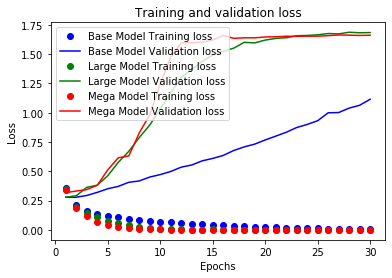

In [20]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, history.history['loss'] , 'bo', label='Base Model Training loss')
plt.plot(epochs, history.history['val_loss'], 'b', label='Base Model Validation loss')
plt.plot(epochs, history_large.history['loss'] , 'go', label='Large Model Training loss')
plt.plot(epochs, history_large.history['val_loss'], 'g', label='Large Model Validation loss')
plt.plot(epochs, history_mega.history['loss'] , 'ro', label='Mega Model Training loss')
plt.plot(epochs, history_mega.history['val_loss'], 'r', label='Mega Model Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

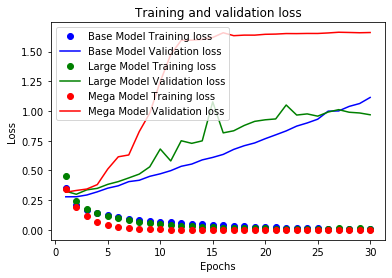

In [28]:
plt.plot(epochs, history.history['loss'] , 'bo', label='Base Model Training loss')
plt.plot(epochs, history.history['val_loss'], 'b', label='Base Model Validation loss')
plt.plot(epochs, history_large.history['loss'] , 'go', label='Large Model Training loss')
plt.plot(epochs, history_large.history['val_loss'], 'g', label='Large Model Validation loss')
plt.plot(epochs, history_mega.history['loss'] , 'ro', label='Mega Model Training loss')
plt.plot(epochs, history_mega.history['val_loss'], 'r', label='Mega Model Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

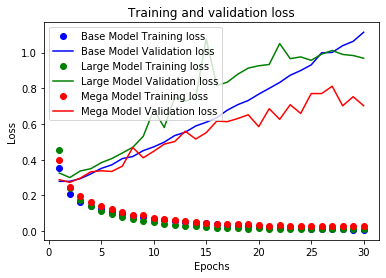

In [31]:
plt.plot(epochs, history.history['loss'] , 'bo', label='Base Model Training loss')
plt.plot(epochs, history.history['val_loss'], 'b', label='Base Model Validation loss')
plt.plot(epochs, history_large.history['loss'] , 'go', label='Large Model Training loss')
plt.plot(epochs, history_large.history['val_loss'], 'g', label='Large Model Validation loss')
plt.plot(epochs, history_mega.history['loss'] , 'ro', label='Mega Model Training loss')
plt.plot(epochs, history_mega.history['val_loss'], 'r', label='Mega Model Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
model.predict(x_test)

array([[9.4338906e-01],
       [1.0000000e+00],
       [5.1855856e-01],
       ...,
       [5.9604645e-08],
       [0.0000000e+00],
       [0.0000000e+00]], dtype=float32)